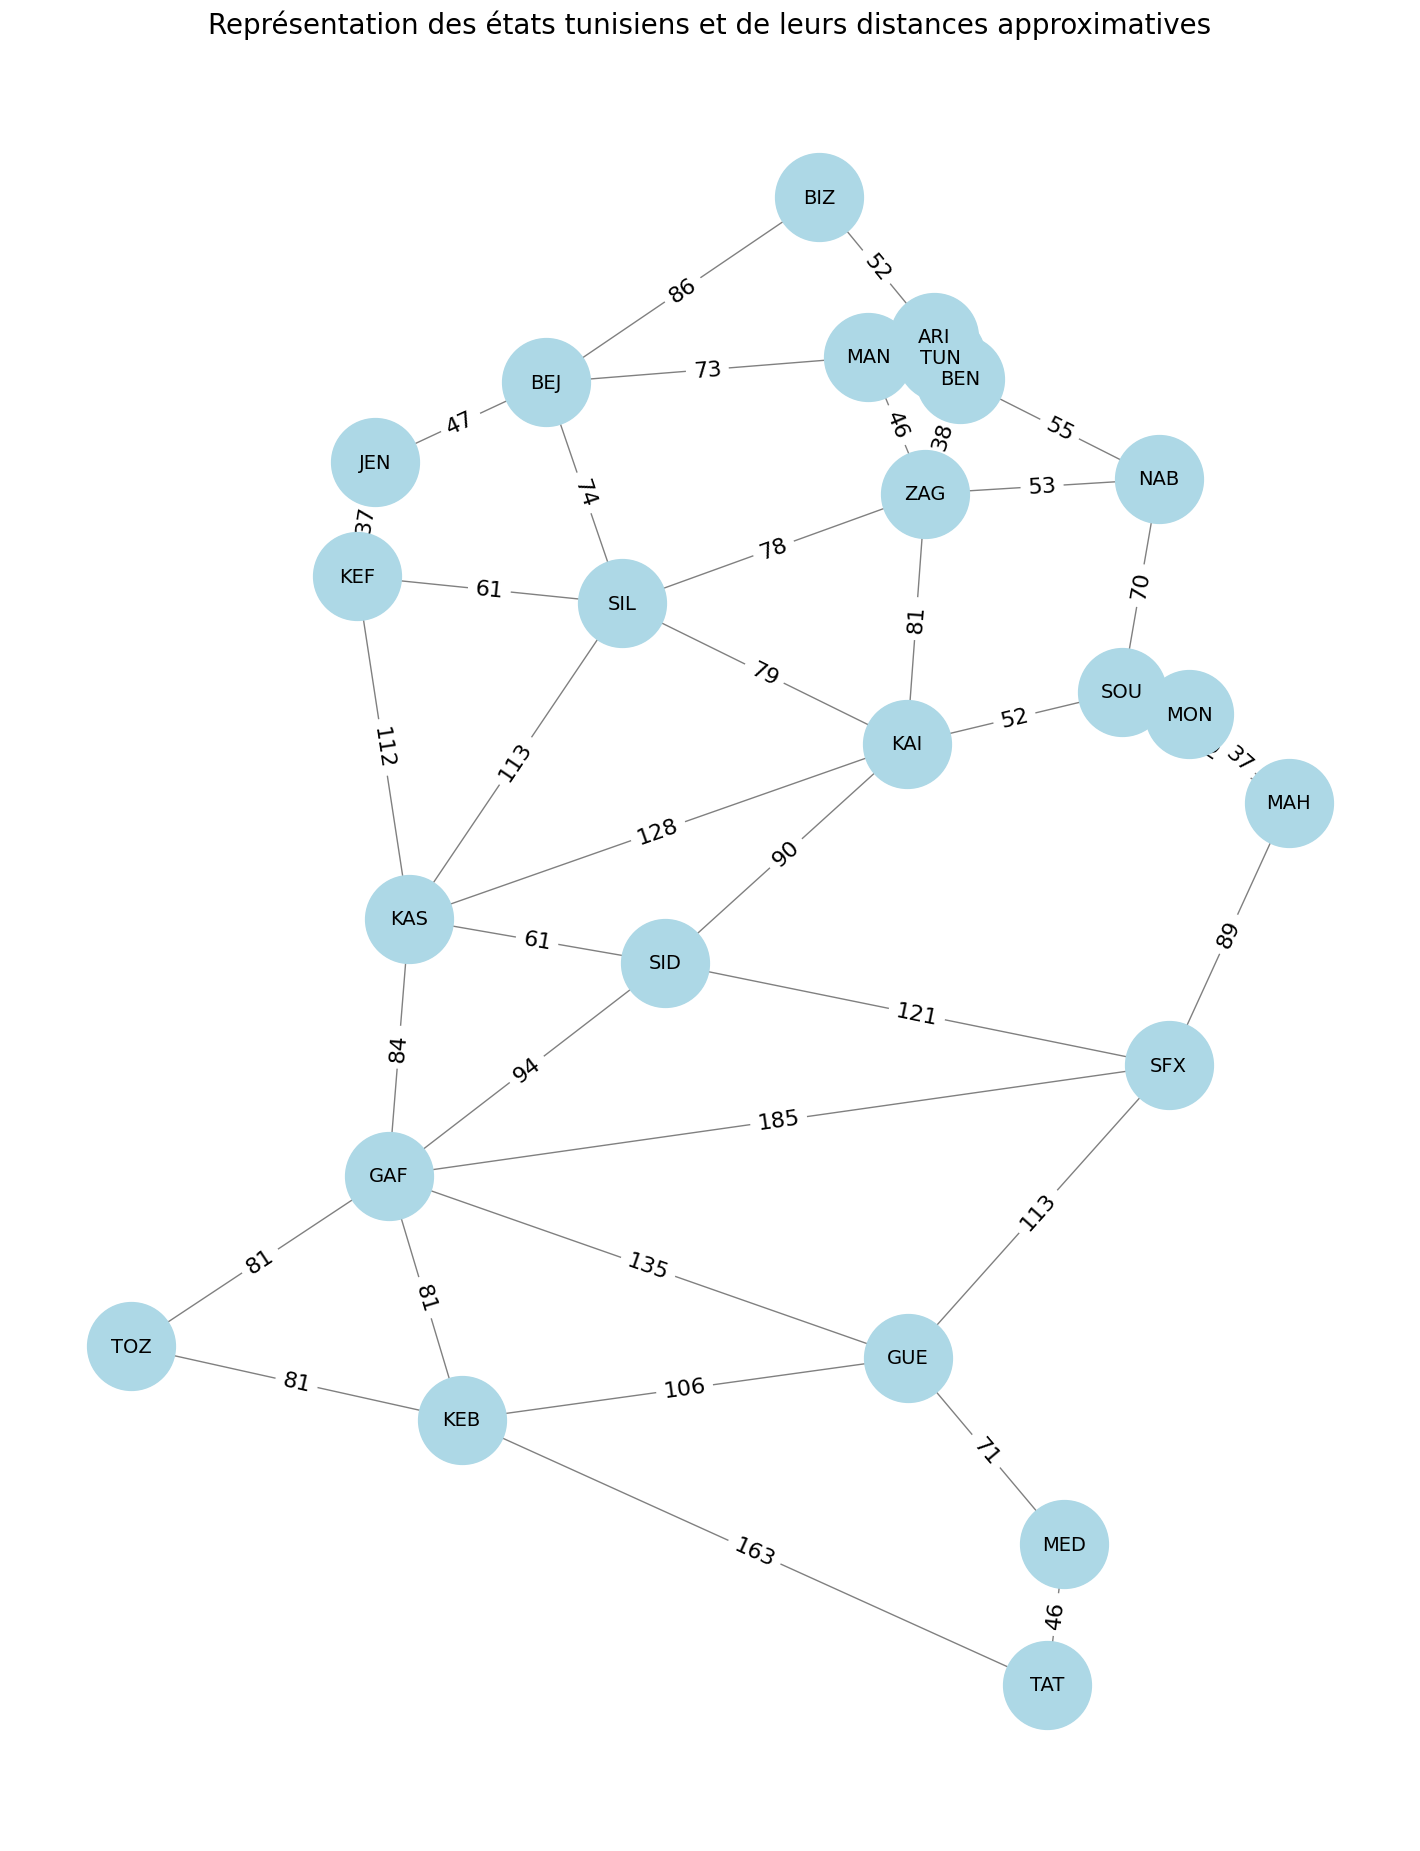

In [56]:
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

gouvernorats = {
    "TUN": (36.8065, 10.1815),
    "ARI": (36.8665, 10.1647),
    "BEN": (36.7435, 10.2316),
    "MAN": (36.8083, 9.9990),
    "BIZ": (37.2744, 9.8739),
    "NAB": (36.4510, 10.7340),
    "ZAG": (36.4090, 10.1429),
    "BEJ": (36.7333, 9.1833),
    "JEN": (36.5000, 8.7500),
    "SIL": (36.0881, 9.3748),
    "KEF": (36.1670, 8.7040),
    "KAI": (35.6781, 10.0963),
    "SOU": (35.8288, 10.6405),
    "MON": (35.7643, 10.8113),
    "MAH": (35.5047, 11.0622),
    "SFX": (34.7390, 10.7590),
    "GUE": (33.8846, 10.0982),
    "MED": (33.3399, 10.4951),
    "TAT": (32.9297, 10.4518),
    "GAF": (34.4160, 8.7842),
    "TOZ": (33.9187, 8.1336),
    "KEB": (33.7044, 8.9690),
    "SID": (35.0382, 9.4840),
    "KAS": (35.1676, 8.8365),
}

# Définir les etats voisins
voisins = {
    "TUN": ["ARI", "BEN", "MAN"],
    "ARI": ["TUN", "BEN", "MAN", "BIZ"],
    "BEN": ["TUN", "ARI", "NAB", "ZAG", "MAN"],
    "MAN": ["TUN", "ARI", "BEN", "BEJ", "ZAG"],
    "BIZ": ["ARI", "BEJ"],
    "NAB": ["BEN", "ZAG", "SOU"],
    "ZAG": ["BEN", "MAN", "NAB", "SIL", "KAI"],
    "BEJ": ["MAN", "BIZ", "JEN", "SIL"],
    "JEN": ["BEJ", "KEF"],
    "SIL": ["BEJ", "ZAG", "KAI", "KEF", "KAS"],
    "KEF": ["JEN", "SIL", "KAS"],
    "KAI": ["ZAG", "SIL", "SOU", "SID", "KAS"],
    "SOU": ["NAB", "KAI", "MON", "MAH"],
    "MON": ["SOU", "MAH"],
    "MAH": ["SOU", "MON", "SFX"],
    "SFX": ["MAH", "GUE", "SID", "GAF"],
    "GUE": ["SFX", "MED", "KEB", "GAF"],
    "MED": ["GUE", "TAT"],
    "TAT": ["MED", "KEB"],
    "GAF": ["SFX", "GUE", "KEB", "TOZ", "KAS", "SID"],
    "TOZ": ["GAF", "KEB"],
    "KEB": ["TOZ", "GAF", "GUE", "TAT"],
    "SID": ["KAI", "GAF", "SFX", "KAS"],
    "KAS": ["KEF", "SIL", "KAI", "SID", "GAF"],
}

# Calculer les distances

def calculer_distance(etat1, etat2):
    return geodesic(gouvernorats[etat1], gouvernorats[etat2]).km

# Créer le graphe
G = nx.Graph()

# Ajouter les nœuds
for etat in gouvernorats:
    G.add_node(etat, pos=gouvernorats[etat])

# Ajouter les arêtes avec les distances
for etat, liste_voisins in voisins.items():
    for voisin in liste_voisins:
        if not G.has_edge(etat, voisin):  # Éviter les arêtes en double
            distance = calculer_distance(etat, voisin)
            G.add_edge(etat, voisin, weight=round(distance))

# Dessiner le graphe
plt.figure(figsize=(14, 18))
pos = {etat: (lon, lat) for etat, (lat, lon) in gouvernorats.items()}  # Ajuster pour un bon tracé

nx.draw(G, pos, with_labels=True, node_size=4000, node_color="lightblue", font_size=14, edge_color="gray")

# Dessiner les étiquettes des arêtes (distances)
etiquettes_aretes = {(etat, voisin): G[etat][voisin]['weight'] for etat, voisin in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquettes_aretes, font_size=16)

plt.title("Représentation des états tunisiens et de leurs distances approximatives", fontsize=20)
plt.show()


Dropdown(description='Départ :', options=('TUN', 'ARI', 'BEN', 'MAN', 'BIZ', 'NAB', 'ZAG', 'BEJ', 'JEN', 'SIL'…

Dropdown(description='Arrivée :', options=('TUN', 'ARI', 'BEN', 'MAN', 'BIZ', 'NAB', 'ZAG', 'BEJ', 'JEN', 'SIL…

Button(description='Trouver le plus court chemin', style=ButtonStyle())

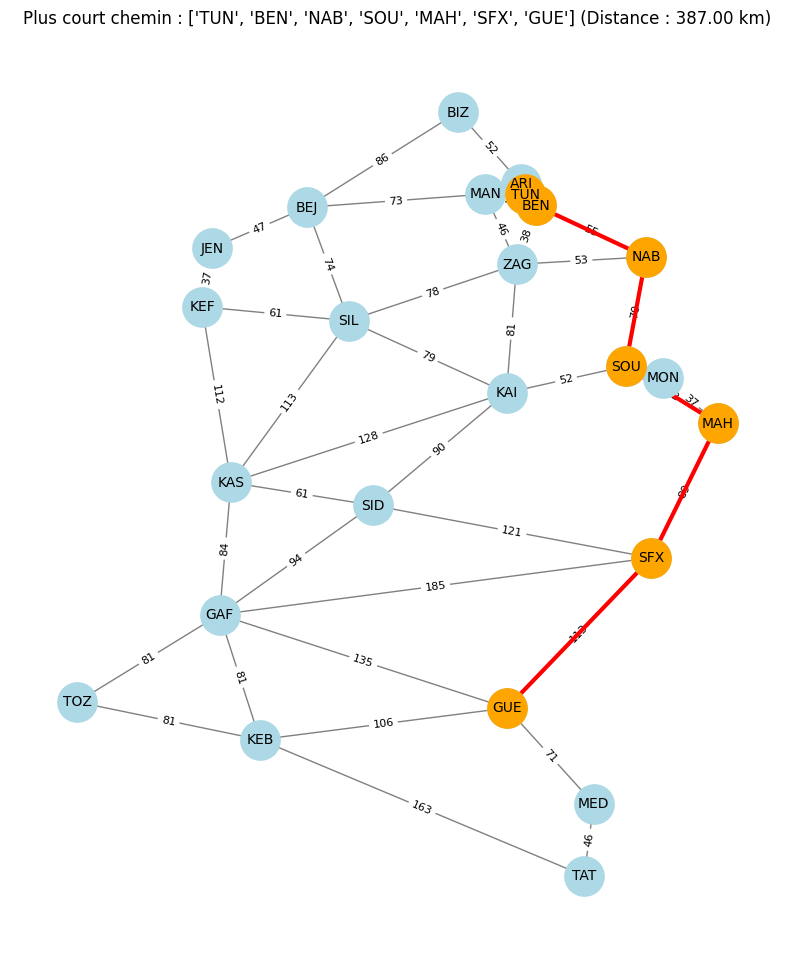

In [57]:
import ipywidgets as widgets
from IPython.display import display

# Fonction pour dessiner le graphe et mettre en évidence le plus court chemin
def dessiner_graphe(depart, arrivee):
    fig, ax = plt.subplots(figsize=(10, 12))
    pos = {etat: (lon, lat) for etat, (lat, lon) in gouvernorats.items()}
    nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10, edge_color="gray")

    # Dessiner les étiquettes des arêtes (distances)
    etiquettes_aretes = {(etat, voisin): G[etat][voisin]['weight'] for etat, voisin in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquettes_aretes, font_size=8)

    if depart and arrivee and depart != arrivee:
        try:
            chemin = nx.dijkstra_path(G, depart, arrivee, weight='weight')
            aretes_chemin = list(zip(chemin, chemin[1:]))

            # Mettre en évidence le plus court chemin
            nx.draw_networkx_edges(G, pos, edgelist=aretes_chemin, edge_color='red', width=3)
            nx.draw_networkx_nodes(G, pos, nodelist=chemin, node_color="orange", node_size=800)

            longueur_chemin = nx.dijkstra_path_length(G, depart, arrivee, weight='weight')
            ax.set_title(f"Plus court chemin : {chemin} (Distance : {longueur_chemin:.2f} km)", fontsize=12)
        except nx.NetworkXNoPath:
            ax.set_title("Aucun chemin disponible !", fontsize=12, color="red")

    plt.show()

# Création des menus déroulants
depart_dropdown = widgets.Dropdown(
    options=list(gouvernorats.keys()),
    description="Départ :",
    style={'description_width': 'initial'}
)

arrivee_dropdown = widgets.Dropdown(
    options=list(gouvernorats.keys()),
    description="Arrivée :",
    style={'description_width': 'initial'}
)

# Création du bouton pour déclencher le calcul du chemin
bouton_chemin = widgets.Button(description="Trouver le plus court chemin")

# Fonction pour gérer le clic sur le bouton
def trouver_chemin(b):
    depart = depart_dropdown.value
    arrivee = arrivee_dropdown.value
    dessiner_graphe(depart, arrivee)

# Associer le bouton à la fonction
bouton_chemin.on_click(trouver_chemin)

# Afficher les widgets dans l'IDE
display(depart_dropdown, arrivee_dropdown, bouton_chemin)


# Implémentation avec BELLMAN FORD

Dropdown(description='Départ :', options=('TUN', 'ARI', 'BEN', 'MAN', 'BIZ', 'NAB', 'ZAG', 'BEJ', 'JEN', 'SIL'…

Dropdown(description='Arrivée :', options=('TUN', 'ARI', 'BEN', 'MAN', 'BIZ', 'NAB', 'ZAG', 'BEJ', 'JEN', 'SIL…

Button(description='Trouver le plus court chemin', style=ButtonStyle())

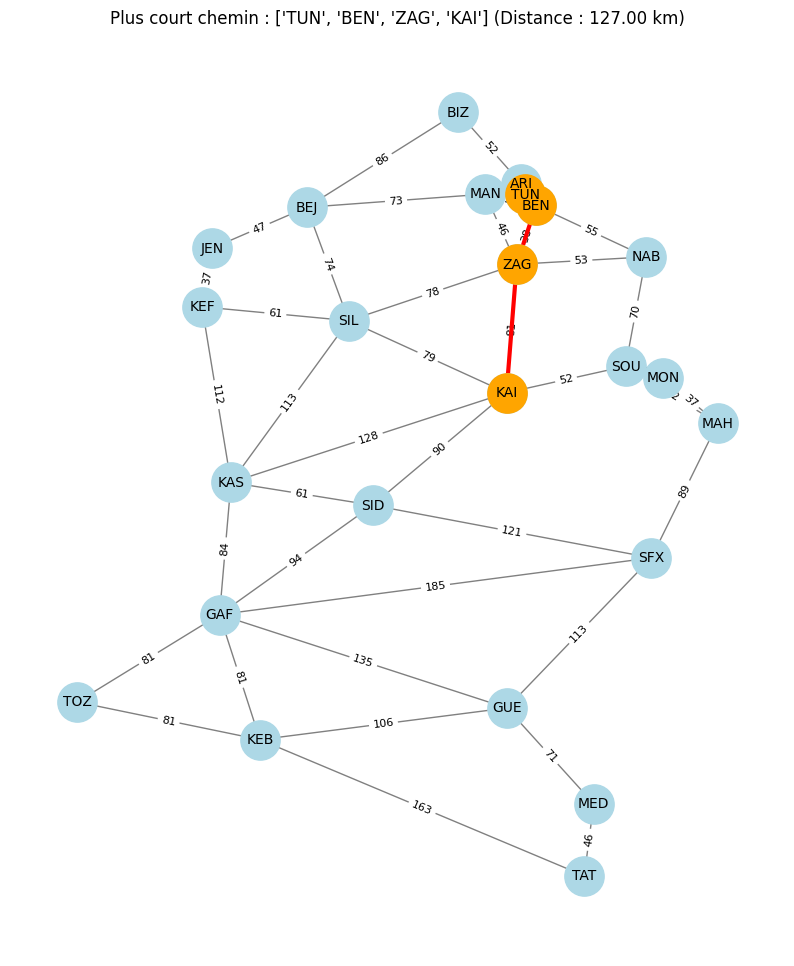

In [58]:
# Fonction pour dessiner le graphe et mettre en évidence le plus court chemin
def dessiner_graphe(depart, arrivee):
    fig, ax = plt.subplots(figsize=(10, 12))
    pos = {etat: (lon, lat) for etat, (lat, lon) in gouvernorats.items()}
    nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10, edge_color="gray")

    # Dessiner les arêtes (distances)
    etiquettes_aretes = {(etat, voisin): G[etat][voisin]['weight'] for etat, voisin in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquettes_aretes, font_size=8)

    if depart and arrivee and depart != arrivee:
        try:
            chemin = nx.bellman_ford_path(G, depart, arrivee, weight='weight')
            aretes_chemin = list(zip(chemin, chemin[1:]))

            # Mettre en évidence le plus court chemin
            nx.draw_networkx_edges(G, pos, edgelist=aretes_chemin, edge_color='red', width=3)
            nx.draw_networkx_nodes(G, pos, nodelist=chemin, node_color="orange", node_size=800)

            longueur_chemin = nx.bellman_ford_path_length(G, depart, arrivee, weight='weight')
            ax.set_title(f"Plus court chemin : {chemin} (Distance : {longueur_chemin:.2f} km)", fontsize=12)
        except nx.NetworkXNoPath:
            ax.set_title("Aucun chemin disponible !", fontsize=12, color="red")

    plt.show()

# Création des menus de séléction
depart_dropdown = widgets.Dropdown(
    options=list(gouvernorats.keys()),
    description="Départ :",
    style={'description_width': 'initial'}
)

arrivee_dropdown = widgets.Dropdown(
    options=list(gouvernorats.keys()),
    description="Arrivée :",
    style={'description_width': 'initial'}
)

# Création du bouton pour déclencher le calcul du chemin
bouton_chemin = widgets.Button(description="Trouver le plus court chemin")

# Fonction pour gérer le clic sur le bouton
def trouver_chemin(b):
    depart = depart_dropdown.value
    arrivee = arrivee_dropdown.value
    dessiner_graphe(depart, arrivee)

# Associer le bouton à la fonction
bouton_chemin.on_click(trouver_chemin)

# Afficher les widgets dans l'IDE
display(depart_dropdown, arrivee_dropdown, bouton_chemin)
